# Part 1: Mutual Information Classification

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('loan.csv')

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2 

In [11]:
# Handle null values (replace 'most_frequent' with an appropriate imputation strategy)
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the dataset after handling null values
print("\nDataset after null value handling:")
print(df.head())



Dataset after null value handling:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

  ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term  \
0            5849               0.0      120.0            360.0   
1            4583            1508.0      128.0            360.0   
2            3000               0.0       66.0            360.0   
3            2583            2358.0      120.0            360.0   
4            6000               0.0      141.0            360.0   

  Credit_History Property_Area Loan_Status  
0            1.0         Urban           Y  
1            1.0         Rural           N  
2          

In [12]:
# Separate features (X) and target variable (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Label encoding for categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Display the dataset after label encoding
print("\nDataset after label encoding:")
print(X_encoded.head())



Dataset after label encoding:
   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              376                  0          73                 8   
1              306                 60          81                 8   
2              139                  0          26                 8   
3               90                160          73                 8   
4              381                  0          94                 8   

   Credit_History  Property_Area  
0               1              2  
1               1              0  
2               1     

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Use SelectKBest to select the top K features based on mutual information scores
k_best_selector = SelectKBest(score_func=mutual_info_classif, k=3)  # Choose an appropriate value of K
X_train_kbest = k_best_selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = k_best_selector.get_support(indices=True)

# Print the names or indices of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]
print("\nSelected Features:")
print(selected_feature_names)


Selected Features:
Index(['Self_Employed', 'Credit_History', 'Property_Area'], dtype='object')


# Part 2: Mutual Information Regression

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

# Load the dataset (replace 'housing_dataset.csv' with the actual file path)
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())


Original Dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0  

In [17]:
# Handle null values (replace 'mean' with an appropriate imputation strategy)
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the dataset after null value handling
print("\nDataset after null value handling:")
print(df.head())


Dataset after null value handling:
  Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape  \
0  1         60       RL        65.0    8450   Pave  Grvl      Reg   
1  2         20       RL        80.0    9600   Pave  Grvl      Reg   
2  3         60       RL        68.0   11250   Pave  Grvl      IR1   
3  4         70       RL        60.0    9550   Pave  Grvl      IR1   
4  5         60       RL        84.0   14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold SaleType SaleCondition SalePrice  
0      2   2008       WD        Normal   

In [21]:
# Separate features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Label encoding for categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Display the dataset after label encoding
print("\nDataset after label encoding:")
print(X.head())


Dataset after label encoding:
   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   0           5         3           36      327       1      0         3   
1   1           0         3           51      498       1      0         3   
2   2           5         3           39      702       1      0         0   
3   3           6         3           31      489       1      0         0   
4   4           5         3           55      925       1      0         0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            3          0  ...            0         0       2      2   
1            3          0  ...            0         0       2      2   
2            3          0  ...            0         0       2      2   
3            3          0  ...            0         0       2      2   
4            3          0  ...            0         0       2      2   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  


In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestRegressor to estimate mutual information scores
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
mutual_info_scores = rf_regressor.feature_importances_

# Use SelectKBest to select the top K features based on mutual information scores
k_best_selector = SelectKBest(score_func=mutual_info_regression, k=3)  # Choose an appropriate value of K
X_train_kbest = k_best_selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = k_best_selector.get_support(indices=True)

# Print the names or indices of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]
print("\nSelected Features:")
print(selected_feature_names)


Selected Features:
Index(['OverallQual', 'GrLivArea', 'GarageCars'], dtype='object')


# Part 3 : Linear Regression on the Housing Dataset

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the Housing dataset (replace 'housing_dataset.csv' with the actual file path)
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0  

In [33]:
# Handle null values (replace 'mean' with an appropriate imputation strategy)
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the dataset after null value handling
print("\nDataset after null value handling:")
print(df.head())


Dataset after null value handling:
  Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape  \
0  1         60       RL        65.0    8450   Pave  Grvl      Reg   
1  2         20       RL        80.0    9600   Pave  Grvl      Reg   
2  3         60       RL        68.0   11250   Pave  Grvl      IR1   
3  4         70       RL        60.0    9550   Pave  Grvl      IR1   
4  5         60       RL        84.0   14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold SaleType SaleCondition SalePrice  
0      2   2008       WD        Normal   

In [44]:
# Separate features (X) and target variable (y)
X = df.drop('YrSold', axis=1)
y = df['YrSold']

# Label encoding for categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the dataset into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler (optional but can improve model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict house prices for the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R^2 values
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Coefficient of Determination (R^2): {r2:.2f}")


Mean Squared Error (MSE): 1.82
Coefficient of Determination (R^2): 0.00


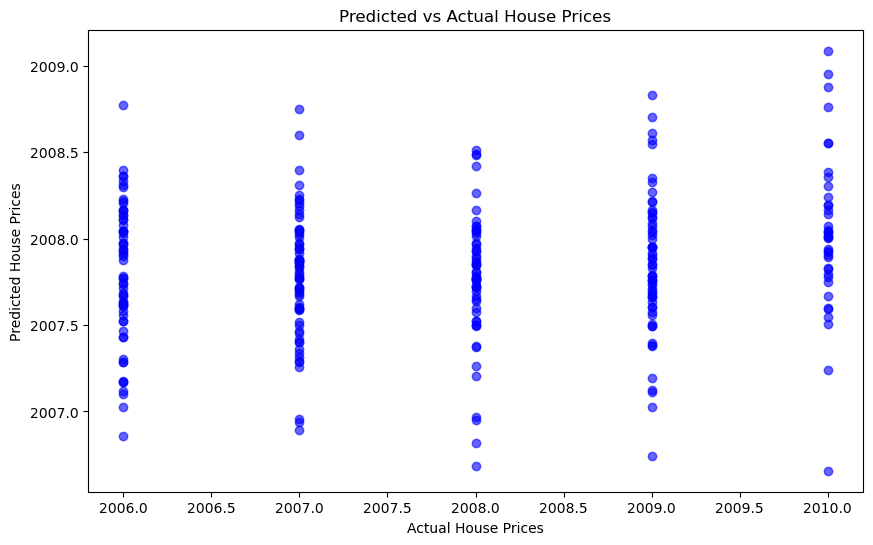

In [45]:
# Plot a scatter plot between predicted and actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()